In [70]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.


#from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
#from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
#from sklearn.impute import KNNImputer  # imputes missing values using KNN.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
#from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.linear_model import LinearRegression  # will use to replace missing values linear regressoin
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

#%matplotlib inline  # helps in showing plots on the browser.

In [71]:
df = pd.read_csv("banknote.csv")

In [72]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [74]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Function to evaluate different models

In [76]:
def Classifier_function(model, X_train, y_train,X_test,y_test, title):  # function takes the name of the 
                                                               # model used, the x and y traning and testing sets.
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.

  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and 
                                                                                       #  real results in a np array.
   

  train_accuracy = round(model.score(X_train,y_train),2) * 100  # Getting traing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100
  test_accuracy = round(model.score(X_test,y_test),2) * 100  # Getting testing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100

  print("Model train accuracy: ", train_accuracy, "%")  # printing the model accurcy. 
  print("Model test accuracy: ", test_accuracy, "%")  # printing the model accurcy. 


  print("\n\n")  # printing a new line.
  # getting Accuracy or recall or precision or specificity
  y_test_pred = model.predict(X_test)  # predicted results
  
  cReport = classification_report(y_test,y_test_pred)  # creating a Classification report
  print(cReport)  # creating a Classification report
  
  cm = confusion_matrix(y_test, y_test_p)  # creating the confusion matrix
  cm2 = multilabel_confusion_matrix(y_test, y_test_pred)  # creating a mutable confusion matrix


  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)  # getting the precision,
                                                                                          # recall and f1score for later use.
  accuracy  = round(np.trace(cm) / float(np.sum(cm)), 2) * 100  # getting aaccuracy and multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100.
  precision = round(np.mean(precision),2) * 100  # multipling precision variables mean by 100 after rounding it by
                                                #  2 to get a score between 0 to 100.
  recall = round(np.mean(recall),2) * 100  # multipling recall variables mean by 100 after rounding it by 2 to 
                                           # get a score between 0 to 100.
  f1_score = round(np.mean(f1_score),2) * 100  # multipling f1_score variables mean by 100 after rounding 
                                               # it by 2 to get a score between 0 to 100.

  lable_list = []  # creating a empty list

  for i in range(len(cm)):  # looping in the range of the length of the confusion matrix.
    for j in range(len(cm)):  # looping in the range of the length of the confusion matrix.
        if j == i:  # if the value of j is equal to the value of i.
            # the below code appends the Actual Values Classified correctly to the variable lable_list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) +"\n" + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

        else:   # otherwise
            #  the below function appends the actual values classified wrongly to the variable lable list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) + "\n"  + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

            
  lable_list = np.asarray(lable_list).reshape(len(cm),len(cm))  # resahping the label list as a numpy array to be 
                                                                # used in plotting the confusion matrix
  
  #  the variable function will be will be used to display the results of the evaluation to the confusion matrix.
  total_score = ("Accuracy:   " + str(accuracy) +" %" + "\nPrecison:    "  + str(precision)  +" %" + "\nRecall:        " +\
                 str(recall)  +" %" + "\nF1 score:    "  + str(f1_score) +" %") 


  # Below is the code used to plot the confusion matrix.
  plt.figure(figsize = (12,9))  # sets the size of the matrix
  disp = sns.heatmap(cm, annot=lable_list, fmt='', cmap='Blues')  # displays the results of the actual values 
                                                                 #  classified wrongly and correctly.                       
  disp.plot()  # displaying data in plot
  plt.title(title, fontsize=25)  # adding a title to plot
  plt.ylabel('True label', fontsize=20)  # adding a y axis to the plot.
  plt.xlabel('Predicted label' +"\n\nScores\n" +total_score, fontsize=20)  # adding a x axis to the plot
  plt.show()  # showing the plot
    
  result_list = train_accuracy,test_accuracy , precision, recall, f1_score  # returning the results

  

  return result_list  # returns the results from the model.

# Feature Scaling and testing function

In [95]:
def featurescaling(Scaler, X_train, X_test, y_train, y_test, Modelandprams ,Modelname):
    
    sucidedataframe.info()  # checking Basic information on the dataframe being procesed.
    
    sc = Scaler # creating an instance of the object.
    
    print("Before scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets before feature scaling.

    X_train[:, 55:] = sc.fit_transform(X_train[:, 55:])  # Scaling x_train
    X_test[:,55:] = sc.transform(X_test[:, 55:])  # Scaling y_train
    
    print("After scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets after feature scaling.
    print("\nThe result of the model")  
    Classifier_function(Modelandprams , X_train, y_train,X_test, y_test, Modelname)  
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Function to preform Grid Search

In [78]:
def Grid_search_fun(X, y):  # Function takes in X and y values hyperparameters.to perform grid search.
    
    # Grid Search
    C_list = [0.25, 0.5, 0.75, 1]  # how much to avoid misclassifying each training example
    kernel_list = ['linear', 'rbf']  # Kernel type
    gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # how far the influence of a single training example reaches

    para_grid = dict(C=C_list,kernel=kernel_list, gamma=gamma_list)  # adding the above lists in a dictinary.





    model = SVC()  # creating an instance of the object.
    parameters = [para_grid]  # hyper parameters for the grid search
    grid_search = GridSearchCV(estimator = model,  # model
                           param_grid = parameters,  # hyper paramaters 
                           scoring = 'accuracy',  # score measurement
                           cv = 5, # number of cross validations 
                           n_jobs = -1, return_train_score=False)  # selecting all possible paramaters to go 
    # through to get the best model possible # train score is false as it can be computationaly expensive. without 
    # storing the traning score the grd search is fater
    grid_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(grid_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(grid_search.cv_results_)) # to print the whole result

    best_accuracy = grid_search.best_score_  # the best accuracy 
    best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters

# sub function to preform Random Search

In [79]:
def rand_search_fun(typeofmodelandprams, dict_prams,crossval, X, y):  # Function takes in the model type, number 
                                                             # of crossvalidation sand X and y values as hyperparameters.

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the random search 
    rand_search = RandomizedSearchCV(
                           model,
        #estimator = model,  # model
                           #param_distributions = parameters,  # hyper paramaters 
                           parameters,
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, # selecting all possible paramaters to go through to get the best model possible 
                           return_train_score=False, # train score is false as it can be computationaly expensive. 
                                                      # without storing the traning score the grd search is fater
                           n_iter=10,  # setting the number of iterations
                           random_state=5)  
    rand_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(rand_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(rand_search.cv_results_)) # to print the whole result

    best_accuracy = rand_search.best_score_  # the best accuracy 
    best_parameters = rand_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters



    return rand_search  # return random search value.

# Performs full Random Search on SVM model

In [80]:
def SVM_full_rand_search(X, y):  # performs randomized search

    # Random search 

    C_list = [0.25, 0.5, 0.75, 1]  # how much to avoid misclassifying each training example.
    kernel_list = ['linear']  # Kernel type
    gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # how far the influence of a single training example reaches
    para_rand = dict(C=C_list,kernel=kernel_list, gamma=gamma_list)  # adding the above lists in a dictinory.
    

    rand_search = rand_search_fun(SVC(), para_rand, 5, X, y)  # Using the ranmomized search gunction with
    
    C_list = [0.25, 0.5, 0.75, 1]  # list from 1 - 31 (will be used as KNN's)
    kernel_list = ['rbf']   
    gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    para_rand = dict(C=C_list,kernel=kernel_list, gamma=gamma_list)  # adding the above lists in a dictinory.
                                                                                          # arguments given 
    rand_search = rand_search_fun(SVC(), para_rand, 5, X, y)  # Using the grid search gunction with

## k-fold cross-validation Graph

In [81]:
def SVM_plot_Values(X,y):  # Values required for plotting
    ave_scores = []  # Creating a empty list
    C_list = [0.25, 0.5, 0.75, 1]  # how much to avoid misclassifying each training example
    for c in C_list:  # looping through each value in the C_list variable
        model = SVC(C = c)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                                               # it to the ave_scores list.
    print("ave C scores ", ave_scores)  # printing the average score of the model

    plt.figure()
    plt.title("Best C Selection",fontsize=18)  # Displays plot title
    plt.plot(C_list, ave_scores)  # Displays description of the plots x and y labels.
    plt.xlabel("C values")  # Displays the x axis for the plot
    plt.ylabel("Average CV model accuracy")  # Displays the y axis for the plot
    plt.legend(["C"], loc="lower right")  # adds a legend to the plot.
    plt.grid()  # adds a gird to the plot

    
    ave_scores = []  # Creating a empty list
    gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # how far the influence of a single training example reaches
    for g in gamma_list:  # looping through each value in the C_list variable
        model = SVC(gamma = g)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                    # it to the ave_scores list.
    print("ave gamma scores ", ave_scores)  # printing the average score of the model
    plt.figure()
    plt.title("Best gamma Selection",fontsize=18)  # Displays plot title
    plt.plot(gamma_list, ave_scores)  # Displays description of the plots x and y labels.
    plt.xlabel("gamma values")  # Displays the x axis for the plot
    plt.ylabel("Average CV model accuracy")  # Displays the y axis for the plot
    plt.legend(["gamma"], loc="lower right")  # adds a legend to the plot.
    plt.grid()  # adds a gird to the plot

## k-fold cross-validation

In [82]:
def crossvalscore(model, X, y, cv_val):  # function to perform cross validation with model X, y and cv_val as parameters
    score = cross_val_score(estimator = model, X = X, y = y, cv = cv_val)   # performs different tests to get best accurecy.
    print("Accuracy: {:.2f} %".format(score.mean()*100))  # accuracy printed.
    print("Standard Deviation: {:.2f} %".format(score.std()*100))  # standard deveation printed (std -avarage or std+ avarage )
    return ("Accuracy: {:.2f} %".format(score.mean()*100))  # Accuracy is returned.

# X and y un_edited

## Plotting the SVM with a average Cross-val score

ave C scores  [0.993, 0.996, 0.996, 0.998]
ave gamma scores  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


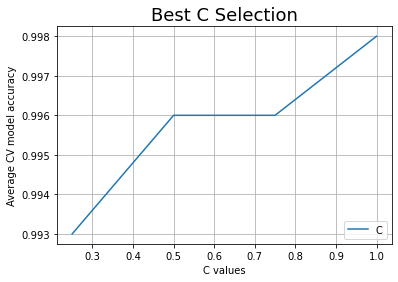

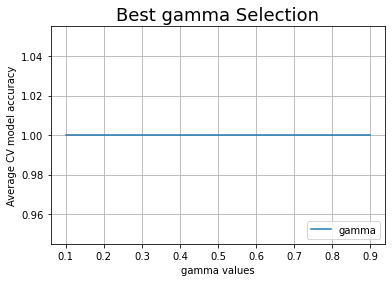

In [83]:
SVM_plot_Values(X,y)  # PLots KNN Cross Val score

## Cross Validation

In [87]:
crossvalscore(SVC(), X, y, 5) #true 0 false 0 

Accuracy: 99.78 %
Standard Deviation: 0.18 %


'Accuracy: 99.78 %'

## Grid Search

In [90]:
Grid_search_fun(X, y)  # performs grid search.

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.019400      0.003499         0.002000        0.000634    0.25   
1        0.057199      0.021452         0.024803        0.011804    0.25   
2        0.018600      0.001856         0.001601        0.000490    0.25   
3        0.064399      0.013692         0.037604        0.009439    0.25   
4        0.026204      0.013968         0.002399        0.000793    0.25   
..            ...           ...              ...             ...     ...   
67       0.100199      0.029631         0.043203        0.011196       1   
68       0.020998      0.003632         0.002201        0.000400       1   
69       0.115202      0.030856         0.052200        0.009705       1   
70       0.025802      0.007310         0.001797        0.000398       1   
71       0.154000      0.030745         0.047202        0.007466       1   

   param_gamma param_kernel                                         params  \
0        

## Random search 

In [91]:
SVM_full_rand_search(X, y)  # performs random search.

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       0.022796      0.006430         0.001407        0.000487       linear   
1       0.034000      0.014887         0.001999        0.000895       linear   
2       0.018596      0.001850         0.002805        0.002136       linear   
3       0.023197      0.008135         0.004002        0.005514       linear   
4       0.022600      0.004224         0.001802        0.000751       linear   
5       0.017200      0.002480         0.001598        0.000802       linear   
6       0.018200      0.001939         0.001401        0.000492       linear   
7       0.021600      0.004674         0.002203        0.000400       linear   
8       0.032408      0.008708         0.001995        0.000631       linear   
9       0.021401      0.003204         0.003202        0.002485       linear   

  param_gamma param_C                                         params  \
0         0.5       1     {'kernel': 'linear', 

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [93]:
Classifier_function(SVC(), X_train, y_train,X_test, y_test, "SVM Model")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

  results
pred-Actual
[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0

NameError: name 'classification_report' is not defined

# Results after feature scaling

# StandardScaler

In [96]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,\
               SVM() ,"SVM Model")
# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

Before scaling:
X_test  [[ -1.7713   -10.7665    10.2184    -1.0043  ]
 [  5.1321    -0.031048   0.32616    1.1151  ]
 [ -2.0149     3.6874    -1.9385    -3.8918  ]
 ...
 [ -2.1652     3.0211    -2.4132    -2.4241  ]
 [  0.48797    3.5674    -4.3882    -3.8116  ]
 [ -4.3667     6.0692     0.57208   -5.4668  ]] 

X_train  [[-1.2943    2.6735   -0.84085  -2.0323  ]
 [-0.40857   3.0977   -2.9607   -2.6892  ]
 [-1.5228   -6.4789    5.7568    0.87325 ]
 ...
 [ 0.6005    0.99945  -2.2126    0.097399]
 [ 2.0165   -0.25246   5.1707    1.0763  ]
 [-2.0759   10.8223    2.6439   -4.837   ]]


ValueError: Found array with 0 feature(s) (shape=(1097, 0)) while a minimum of 1 is required by StandardScaler.

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test,\
               SVM() ,"SVM Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,\
               SVM() ,"SVM Model")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [85]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test,\
               SVM() ,"SVM Model")

# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

NameError: name 'SVM' is not defined